In [1]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.0 MB/s eta 0:00:00


In [4]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 3.7 MB/s eta 0:00:00


#Import necessary libraries

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import neattext.functions as nfx
from google.colab import drive
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string

#Mount Google Drive


In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


#Define a function to handle bad lines in the CSV file

In [7]:
def bad_line(x):
  print(x)
  return None

#Load the dataset

In [8]:
df_data = pd.read_csv('/content/drive/Othercomputers/My Laptop (1)/year4/final_project/data_science/data_set/final_combined.csv', on_bad_lines=bad_line, engine='python')
print(df_data.shape)

(1529906, 22)


#Define a regular expression pattern that matches English letters

In [9]:
english_pattern = re.compile(r'[a-zA-Z]')
#Use str.contains() method to keep only rows where the 'Tweet' column contains English letters
df_data = df_data[df_data['Tweet'].str.contains(english_pattern)]

#Define a function to clean the text

In [10]:
def clean_text(text):
  # Remove URLs
  text = re.sub(r'http\S+', '', text)
  # Remove mentions (@)
  text = re.sub(r'@\w+', '', text)
  # Remove hashtags (#)
  text = re.sub(r'#\w+', '', text)
  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))
  # Convert to lowercase
  text = text.lower()
  # Remove extra spaces
  text = re.sub(r'\s+', ' ', text).strip()
  return text

#Clean the 'Tweet' column and create a new column 'clean_tweet'

In [11]:
df_data['clean_tweet'] = df_data['Tweet'].apply(clean_text)
# Remove white spaces and new line characters from 'clean_tweet'
df_data['clean_tweet'] = df_data['clean_tweet'].apply(nfx.remove_multiple_spaces)

#Define a function to calculate subjectivity of a tweet

In [12]:
def get_subjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity

#Define a function to calculate polarity of a tweet

In [13]:
def get_polarity(tweet):
  return TextBlob(tweet).sentiment.polarity

#Create two columns for subjectivity and polarity

In [ ]:
df_data['subjectivity'] = df_data['clean_tweet'].apply(get_subjectivity)
df_data['polarity'] = df_data['clean_tweet'].apply(get_polarity)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Define a function to get the sentiment of a tweet based on its polarity score

In [ ]:
def getSentiment(score):
  if (score < 0 ):
  return 'negative'
  elif (score == 0):
  return 'neutral'
  else:
  return 'positive'

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndentationError: ignored

#Create a new column 'sentiment' to store the sentiment of each tweet

In [ ]:
df_data['sentiment'] = df_data['polarity'].apply(getSentiment)

In [ ]:
df_data.head(2)

In [ ]:
!pip install neattext

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import neattext.functions as nfx
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string

Mounted at /content/drive


In [3]:
def bad_line(x):
    print(x)
    return None

df_data = pd.read_csv('/content/drive/Othercomputers/My Laptop (1)/year4/final_project/data_science/data_set/final_combined.csv',  on_bad_lines=bad_line, engine='python')


print(df_data.shape)
df_data.dtypes

(1529906, 22)


Tweet                       object
Date                        object
time                        object
Day of week                 object
Cashtags                    object
Hashtags                    object
Language                    object
Location                      bool
Mentioned_users               bool
Followers                  float64
Following                  float64
User_created_date           object
Listed_count               float64
Favourite_count            float64
Tweet_count                float64
Verified                      bool
Average_favourite_count    float64
account_age                float64
Likes                      float64
Comments                   float64
Retweets                   float64
Views                      float64
dtype: object

In [4]:
df_data.shape

(1529906, 22)

In [5]:

# Define a regular expression pattern that matches English letters
english_pattern = re.compile(r'[a-zA-Z]')

# Use str.contains() method to keep only rows where the 'name' column contains English letters
df_data = df_data[df_data['Tweet'].str.contains(english_pattern)]

In [6]:

# define a function to clean the text
def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove mentions (@)
    text = re.sub(r'@\w+', '', text)
    # remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # convert to lowercase
    text = text.lower()
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [7]:
df_data['clean_tweet'] = df_data['Tweet'].apply(clean_text)

In [8]:
#removing white spaces \n charcters

df_data['clean_tweet'] = df_data['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [9]:
# Polarity, also known as orientation is he emotion expressed in the sentence. It can be positive,
# neagtive or neutral. Subjectivity is when text is an explanatory article which must be analysed in context.

In [10]:
# learn more https://textblob.readthedocs.io/en/dev/quickstart.html

#function to the subjectivity
def get_subjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity


#function to the polarity
def get_polarity(tweet):
  return TextBlob(tweet).sentiment.polarity

In [11]:
#craete two colums for subjectivety and polarity
df_data['subjectivity'] = df_data['clean_tweet'].apply(get_subjectivity)

#craete two colums for subjectivety and polarity
df_data['polarity'] = df_data['clean_tweet'].apply(get_polarity)



In [12]:
#get the text the user felling about bit coin

def getSentiment(score):
  if (score < 0 ):
    return'negative'
  elif (score == 0):
    return 'nuteral'
  else:
    return 'positive'

In [13]:
df_data['sentiment'] = df_data['polarity'].apply(getSentiment)

In [14]:
df_data.head(2)

,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,Average_favourite_count,account_age,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment
0,@RockNRoLL_85 Apples &amp; oranges. Eddie's g...,2023-03-25 23:59:58,23:59:58,Saturday,NaN,NaN,en,False,True,220.0,...,1.559077,11.0,0.0,0.0,0.0,9.0,apples amp oranges eddies guitar riffs are the...,0.900000,0.60,positive
1,I trust Apple weather app with my life and I j...,2023-03-25 23:59:55,23:59:55,Saturday,NaN,NaN,en,True,False,168.0,...,0.177647,9.0,0.0,0.0,0.0,108.0,i trust apple weather app with my life and i j...,0.691667,0.05,positive


In [ ]:
#lets plot
# upper_range = df_data.shape[0] * 0.1
# plt.figure(figsize=(18,10))
# for i in range(0,10000):
#   plt.scatter(df_data['polarity'][i] ,df_data['subjectivity'][i] ,color='Blue')
# plt.title('sentiment analysis')
# plt.xlabel('polarity')
# plt.ylabel('subjectivity')
# plt.show()

In [ ]:
# df_data['sentiment'].value_counts().plot(kind ='bar')
# plt.title('sentiment analysis')
# plt.xlabel('setiment')
# plt.ylabel('no of counts')
# plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset randomly
train_data, test_data = train_test_split(df_data, test_size=0.97, random_state=42)

In [16]:
train_data.shape

(45239, 26)

# topic modeling with Latent Dirichlet Allocation (LDA) 

In [17]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 24.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel

import spacy

import pyLDAvis
import pyLDAvis.gensim


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
stopwords = stopwords.words("english")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:

# Define a function to clean the text
def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove mentions (@)
    text = re.sub(r'@\w+', '', text)
    # remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # convert to lowercase
    text = text.lower()
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
!python -m spacy download en_core_web_md 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2023-04-10 11:32:35.153771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 9.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [25]:

# Apply the cleaning function to the 'Tweet' column
df_data['clean_tweet'] = df_data['Tweet'].apply(clean_text)

# Remove non-English tweets
english_pattern = re.compile(r'[a-zA-Z]')
df_data = df_data[df_data['clean_tweet'].str.contains(english_pattern)]

# Remove stopwords using the built-in stopword list from NLTK

df_data['clean_tweet'] = df_data['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Lemmatize the text using NLTK's WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# df_data['clean_tweet'] = df_data['clean_tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
import spacy

nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags =['NOUN','ADJ']):
  output =[]
  for sent in texts:
    doc = nlp(sent)
    output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
  return output


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
text_list=train_data['clean_tweet'].tolist()
print(text_list[10]) 
tokenized_data = lemmatization(text_list)
print(tokenized_data[10])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


damn teppers turf looks terrible on tv for the charlotte fc game
['damn', 'tepper', 'terrible', 'tv']


In [27]:
# Create a dictionary and corpus for the LDA model
dictionary = corpora.Dictionary(tokenized_data)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_data]



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=100, random_state=100,
                chunksize=1000, passes=50,iterations=50)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary, mds='mmds', R=30)
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [28]:
def preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -52.79856326975183

Coherence Score:  0.44730541363433995


In [29]:
import gensim
import spacy
from gensim.corpora import Dictionary



# preprocess your sentence
nlp = spacy.load('en_core_web_sm')
sentence = "This is a sample sentence to infer the topic."
tokens = [token.lemma_ for token in nlp(sentence) if not token.is_stop and token.is_alpha]

# create a dictionary and corpus from your preprocessed text data
dictionary = Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

# use the trained LDA model to get the topic distribution for the sentence
topic_probs = lda_model.get_document_topics(corpus[0])

# select the top topic for the sentence
top_topic = max(topic_probs, key=lambda x: x[1])[0]

# print the top topic in words
print(lda_model.print_topic(top_topic))

topic = lda_model.print_topic(top_topic, 1)  # limit to 1 topic
word = topic.split("+")[0].split("*")[1].replace('"', '').replace("'", "").replace(" ", "")
print(word)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

In [ ]:
lda_model.save('lda_topic_detection_model.lda')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
split_dfs = np.array_split(df_data, 100)
split_dfs[20].head(2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,Average_favourite_count,account_age,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment
298095,I wrote a 30-email webinar follow-up sequence ...,2023-03-23 07:15:00,07:15:00,Thursday,NaN,NaN,en,True,False,399.0,...,4.124564,2.0,3.0,1.0,0.0,59.0,wrote 30email webinar followup sequence educat...,0.104167,0.0875,positive
298096,Join us on the following stations as we discus...,2023-03-23 07:15:00,07:15:00,Thursday,NaN,"['ibedc', 'imolede', 'ibedclightup', 'ogun', '...",en,True,False,24710.0,...,0.026772,8.0,10.0,16.0,0.0,2201.0,join us following stations discuss issues surr...,0.466667,0.3000,positive


In [32]:
# Train the LDA model on the entire dataset
texts = split_dfs[20]['clean_tweet'].apply(preprocess)
dictionary = Dictionary()
corpus = []

# Loop through each smaller dataset and infer the topics for each document
for text in texts:
    # Convert the document to bag-of-words format using the dictionary
    bow = dictionary.doc2bow(text, allow_update=True)
    corpus.append(bow)

# Train the LDA model on the corpus
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=30, passes=10)

# Get the topic distribution for each document in the current dataset
topic_probs = [lda_model.get_document_topics(doc) for doc in corpus]
# Select the topic with the highest probability for each document
topics = [max(tp, key=lambda x: x[1])[0] for tp in topic_probs]
# Store the inferred topics in a new column in the current dataset
# Replace the topic numbers with their corresponding words
topic_words = [lda_model.get_topic_terms(topic, topn=1) for topic in topics]
topic_words = [[dictionary[id] for id, _ in topic] for topic in topic_words]

# Store the inferred topics in a new column in the current dataset
split_dfs[20]['topics'] = topic_words

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
split_dfs[20].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,account_age,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment,topics
298095,I wrote a 30-email webinar follow-up sequence ...,2023-03-23 07:15:00,07:15:00,Thursday,NaN,NaN,en,True,False,399.0,...,2.0,3.0,1.0,0.0,59.0,wrote 30email webinar followup sequence educat...,0.104167,0.0875,positive,[datum]
298096,Join us on the following stations as we discus...,2023-03-23 07:15:00,07:15:00,Thursday,NaN,"['ibedc', 'imolede', 'ibedclightup', 'ogun', '...",en,True,False,24710.0,...,8.0,10.0,16.0,0.0,2201.0,join us following stations discuss issues surr...,0.466667,0.3000,positive,[datum]
298097,@The_Trump_Train Why....will you need company?,2023-03-23 07:14:59,07:14:59,Thursday,NaN,NaN,en,False,True,19.0,...,2.0,0.0,0.0,0.0,2.0,whywill need company,0.000000,0.0000,nuteral,[free]
298098,@newscomauHQ Not even a real company.....,2023-03-23 07:14:57,07:14:57,Thursday,NaN,NaN,en,True,True,16.0,...,8.0,3.0,0.0,1.0,77.0,even real company,0.300000,0.2000,positive,[real]
298099,Alternative:\nDon't use Adobe.\nGIMP can entir...,2023-03-23 07:14:55,07:14:55,Thursday,NaN,NaN,en,True,False,15.0,...,4.0,0.0,0.0,0.0,151.0,alternative dont use adobe gimp entirely repla...,0.625000,0.0000,nuteral,[china]


In [34]:
df_data.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1404964, 26)

In [35]:
df_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,Average_favourite_count,account_age,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment
0,@RockNRoLL_85 Apples &amp; oranges. Eddie's g...,2023-03-25 23:59:58,23:59:58,Saturday,NaN,NaN,en,False,True,220.0,...,1.559077,11.0,0.0,0.0,0.0,9.0,apples amp oranges eddies guitar riffs songs d...,0.900000,0.600,positive
1,I trust Apple weather app with my life and I j...,2023-03-25 23:59:55,23:59:55,Saturday,NaN,NaN,en,True,False,168.0,...,0.177647,9.0,0.0,0.0,0.0,108.0,trust apple weather app life realized it’s app...,0.691667,0.050,positive
2,Apple AirPods Pro（第2世代） ​​​​​​​ https://t.co/0...,2023-03-25 23:59:52,23:59:52,Saturday,NaN,NaN,ja,True,True,72.0,...,0.350821,4.0,0.0,0.0,0.0,52.0,apple airpods pro（第2世代） ​​​​​​​,0.000000,0.000,nuteral
3,@CRoss714 Apple TV is getting up there with HB...,2023-03-25 23:59:49,23:59:49,Saturday,NaN,NaN,en,True,True,607.0,...,2.781585,13.0,1.0,1.0,0.0,57.0,apple tv getting hbo max original content seve...,0.683333,0.125,positive
4,The night and darkness grows as does the stren...,2023-03-25 23:59:45,23:59:45,Saturday,NaN,NaN,en,True,False,196.0,...,7.230292,11.0,4.0,1.0,0.0,151.0,night darkness grows strength howl wind around...,0.400000,-0.300,negative


In [37]:
# save the DataFrame to a CSV file
df_data.to_csv('data_sentiment.csv', index=False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
texts = split_dfs[10]['clean_tweet'].apply(preprocess)
dictionary = Dictionary()
corpus = []

# Loop through each smaller dataset and infer the topics for each document
for text in texts:
    # Convert the document to bag-of-words format using the dictionary
    bow = dictionary.doc2bow(text, allow_update=True)
    corpus.append(bow)

# # Train the LDA model on the corpus
# lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=30, passes=10)

# Get the topic distribution for each document in the current dataset
topic_probs = [lda_model.get_document_topics(doc) for doc in corpus]
# Select the topic with the highest probability for each document
topics = [max(tp, key=lambda x: x[1])[0] for tp in topic_probs]
# Store the inferred topics in a new column in the current dataset
# Replace the topic numbers with their corresponding words
topic_words = [lda_model.get_topic_terms(topic, topn=1) for topic in topics]
topic_words = [[dictionary[id] for id, _ in topic] for topic in topic_words]
# topic_words = [' '.join(words) for words in topic_words]

# Store the inferred topics in a new column in the current dataset
split_dfs[10]['topics'] = topic_words

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the topic distribution for each document in the current dataset
topic_probs = [lda_model.get_document_topics(doc) for doc in corpus]
# Select the topic with the highest probability for each document
topics = [max(tp, key=lambda x: x[1])[0] for tp in topic_probs]
# Store the inferred topics in a new column in the current dataset
# Replace the topic numbers with their corresponding words
topic_words = [lda_model.get_topic_terms(topic, topn=7) for topic in topics]
topic_words = [[dictionary[id] for id, _ in topic] for topic in topic_words]
# topic_words = [' '.join(words) for words in topic_words]

# Store the inferred topics in a new column in the current dataset
split_dfs[10]['key_words'] = topic_words

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
split_dfs[10].head(2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment,topics,key_words
149937,Logos are a point of identification; they're t...,2023-03-25 06:14:39,06:14:39,Saturday,NaN,NaN,en,True,False,27.0,...,0.0,1.0,0.0,8.0,logos point identification theyre symbol custo...,0.791667,0.45,positive,ogilvy,ogilvy engine фабрика fight construct fwiw can...
149938,#Restart Energy Named Largest Energy Company i...,2023-03-25 06:14:39,06:14:39,Saturday,NaN,['Restart'],en,False,False,41.0,...,0.0,0.0,0.0,2.0,energy named largest energy company romania’s ...,0.000000,0.00,nuteral,airbnb,airbnb los forecast instal joke eh similar


In [ ]:
split_dfs[10].dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tweet                       object
Date                        object
time                        object
Day of week                 object
Cashtags                    object
Hashtags                    object
Language                    object
Location                      bool
Mentioned_users               bool
Followers                  float64
Following                  float64
User_created_date           object
Listed_count               float64
Favourite_count            float64
Tweet_count                float64
Verified                      bool
Average_favourite_count    float64
account_age                float64
Likes                      float64
Comments                   float64
Retweets                   float64
Views                      float64
clean_tweet                 object
subjectivity               float64
polarity                   float64
sentiment                   object
topics                      object
key_words                   object
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset randomly
train_data_a, test_data_a = train_test_split(df_data, test_size=0.95, random_state=42)

In [ ]:
df_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,Average_favourite_count,account_age,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment
0,@RockNRoLL_85 Apples &amp; oranges. Eddie's g...,2023-03-25 23:59:58,23:59:58,Saturday,NaN,NaN,en,False,True,220.0,...,1.559077,11.0,0.0,0.0,0.0,9.0,apple amp orange eddy guitar riff song daves r...,0.900000,0.600,positive
1,I trust Apple weather app with my life and I j...,2023-03-25 23:59:55,23:59:55,Saturday,NaN,NaN,en,True,False,168.0,...,0.177647,9.0,0.0,0.0,0.0,108.0,trust apple weather app life realized it’s app...,0.691667,0.050,positive
2,Apple AirPods Pro（第2世代） ​​​​​​​ https://t.co/0...,2023-03-25 23:59:52,23:59:52,Saturday,NaN,NaN,ja,True,True,72.0,...,0.350821,4.0,0.0,0.0,0.0,52.0,apple airpods pro（第2世代） ​​​​​​​,0.000000,0.000,nuteral
3,@CRoss714 Apple TV is getting up there with HB...,2023-03-25 23:59:49,23:59:49,Saturday,NaN,NaN,en,True,True,607.0,...,2.781585,13.0,1.0,1.0,0.0,57.0,apple tv getting hbo max original content seve...,0.683333,0.125,positive
4,The night and darkness grows as does the stren...,2023-03-25 23:59:45,23:59:45,Saturday,NaN,NaN,en,True,False,196.0,...,7.230292,11.0,4.0,1.0,0.0,151.0,night darkness grows strength howl wind around...,0.400000,-0.300,negative


In [ ]:
# use the trained LDA model to get the topic distribution for each document in your dataset
topic_probs = [lda_model.get_document_topics(doc) for doc in corpus]

# select the topic with the highest probability for each document
topics = [max(tp, key=lambda x: x[1])[0] for tp in topic_probs]

# extract the top word from each topic
top_words = [lda_model.print_topic(topic, 1).split("+")[0].split("*")[1].replace('"', '').replace("'", "").replace(" ", "") for topic in topics]

# create a new column in your dataframe to store the inferred topics
df_data['topics'] = top_words


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
      model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_data, start=2, limit=50, step=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


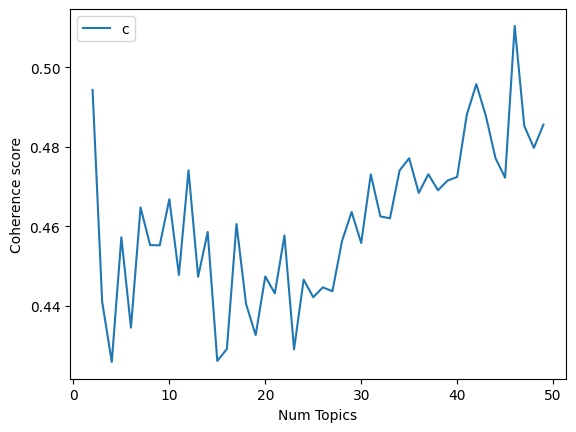

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4943
Num Topics = 3  has Coherence Value of 0.4411
Num Topics = 4  has Coherence Value of 0.426
Num Topics = 5  has Coherence Value of 0.4573
Num Topics = 6  has Coherence Value of 0.4346
Num Topics = 7  has Coherence Value of 0.4648
Num Topics = 8  has Coherence Value of 0.4553
Num Topics = 9  has Coherence Value of 0.4553
Num Topics = 10  has Coherence Value of 0.4668
Num Topics = 11  has Coherence Value of 0.4478
Num Topics = 12  has Coherence Value of 0.4741
Num Topics = 13  has Coherence Value of 0.4473
Num Topics = 14  has Coherence Value of 0.4586
Num Topics = 15  has Coherence Value of 0.4262
Num Topics = 16  has Coherence Value of 0.4292
Num Topics = 17  has Coherence Value of 0.4606
Num Topics = 18  has Coherence Value of 0.4405
Num Topics = 19  has Coherence Value of 0.4327
Num Topics = 20  has Coherence Value of 0.4474
Num Topics = 21  has Coherence Value of 0.4432
Num Topics = 22  has Coherence Value of 0.4577
Num Topics = 23  has C

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
optimal_model = model_list[44]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(16,
  '0.219*"apple" + 0.139*"orange" + 0.102*"watch" + 0.081*"family" + 0.069*"different" + 0.052*"banana" + 0.049*"pear" + 0.048*"datum" + 0.014*"child" + 0.010*"plant"'),
 (24,
  '0.123*"news" + 0.110*"apple" + 0.087*"type" + 0.044*"pencil" + 0.036*"name" + 0.031*"photo" + 0.031*"baby" + 0.031*"rotten" + 0.025*"local" + 0.022*"artist"'),
 (11,
  '0.099*"apple" + 0.060*"vintage" + 0.059*"auction" + 0.059*"service" + 0.055*"collection" + 0.041*"water" + 0.025*"medium" + 0.021*"drink" + 0.021*"social" + 0.020*"orchard"'),
 (1,
  '0.558*"apple" + 0.085*"✅" + 0.056*"product" + 0.033*"world" + 0.029*"guide" + 0.013*"screen" + 0.008*"radio" + 0.008*"major" + 0.007*"chief" + 0.007*"chatgpt"'),
 (12,
  '0.172*"apple" + 0.147*"eye" + 0.102*"green" + 0.023*"camera" + 0.023*"help" + 0.022*"order" + 0.021*"need" + 0.020*"piece" + 0.020*"person" + 0.020*"enough"'),
 (22,
  '0.102*"️" + 0.079*"sound" + 0.071*"comment" + 0.070*"cute" + 0.060*"apple" + 0.041*"system" + 0.032*"quality" + 0.028*"cal

In [ ]:
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Bigrams and Trigrams
bigrams_phrases = gensim.models.Phrases(df_data['clean_tweet'],min_count=5, threshold=50)
tirgrams_phrases = gensim.models.Phrases(bigrams_phrases[df_data['clean_tweet']], threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(tirgrams_phrases)

def make_bigrams(texts):
  return(bigram[doc] for doc in texts)

def make_trigrams(texts):
  return(trigram[doc] for doc in texts)

data_bigrams = make_bigrams(df_data['clean_tweet'])
data_bigrams_trigrams = list(make_trigrams(data_bigrams))

print(data_bigrams_trigrams[0])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['a', 'p', 'p', 'l', 'e', ' ', 'a', 'm', 'p', ' ', 'o', 'r', 'a', 'n', 'g', 'e', ' ', 'e', 'd', 'd', 'y', ' ', 'g', 'u', 'i', 't', 'a', 'r', ' ', 'r', 'i', 'f', 'f', ' ', 's', 'o', 'n', 'g', ' ', 'd', 'a', 'v', 'e', 's', ' ', 'r', 'i', 'f', 'f', ' ', 's', 'e', 'r', 'v', 'e', ' ', 's', 'o', 'n', 'g', ' ', 'a', 'm', 'a', 'z', 'i', 'n', 'g', 'l', 'y']


In [ ]:
# Create a dictionary and corpus for the LDA model
dictionary = corpora.Dictionary(df_data['clean_tweet'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in df_data['clean_tweet']]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_data.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(24078, 26)

In [ ]:
print(corpus[0][0:20])
word = dictionary[[0][:1][0]]
print(word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2)]
amazingly


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=30,random_state = 100,update_every = 1, chunksize= 100, passes=10, alpha='auto')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
vis = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds', R=30)
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the topic with the highest probability for each tweet
topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Add the topics to the dataframe
df_data['Topic'] = topics

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,account_age,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment,Topic
0,@RockNRoLL_85 Apples &amp; oranges. Eddie's g...,2023-03-25 23:59:58,23:59:58,Saturday,NaN,NaN,en,False,True,220.0,...,11.0,0.0,0.0,0.0,9.0,apple amp orange eddy guitar riff song daves r...,0.900000,0.600,positive,28
1,I trust Apple weather app with my life and I j...,2023-03-25 23:59:55,23:59:55,Saturday,NaN,NaN,en,True,False,168.0,...,9.0,0.0,0.0,0.0,108.0,trust apple weather app life realized it’s app...,0.691667,0.050,positive,23
2,Apple AirPods Pro（第2世代） ​​​​​​​ https://t.co/0...,2023-03-25 23:59:52,23:59:52,Saturday,NaN,NaN,ja,True,True,72.0,...,4.0,0.0,0.0,0.0,52.0,apple airpods pro（第2世代） ​​​​​​​,0.000000,0.000,nuteral,28
3,@CRoss714 Apple TV is getting up there with HB...,2023-03-25 23:59:49,23:59:49,Saturday,NaN,NaN,en,True,True,607.0,...,13.0,1.0,1.0,0.0,57.0,apple tv getting hbo max original content seve...,0.683333,0.125,positive,2
4,The night and darkness grows as does the stren...,2023-03-25 23:59:45,23:59:45,Saturday,NaN,NaN,en,True,False,196.0,...,11.0,4.0,1.0,0.0,151.0,night darkness grows strength howl wind around...,0.400000,-0.300,negative,25


In [ ]:
# Get the topic terms for each topic
topic_terms = []
for i in range(lda_model.num_topics):
    topic_terms.append([term for term, prob in lda_model.get_topic_terms(i)])

# Map topic numbers to their corresponding terms
topic_dict = {i: topic_terms[i] for i in range(len(topic_terms))}

# Create a new column with topic terms for each tweet
df_data['Topic_terms'] = df_data['Topic'].apply(lambda x: topic_dict[x])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment,Topic,Topic_terms
0,@RockNRoLL_85 Apples &amp; oranges. Eddie's g...,2023-03-25 23:59:58,23:59:58,Saturday,NaN,NaN,en,False,True,220.0,...,0.0,0.0,0.0,9.0,apple amp orange eddy guitar riff song daves r...,0.900000,0.600,positive,28,"[2, 850, 286, 852, 419, 677, 854, 676, 11, 679]"
1,I trust Apple weather app with my life and I j...,2023-03-25 23:59:55,23:59:55,Saturday,NaN,NaN,en,True,False,168.0,...,0.0,0.0,0.0,108.0,trust apple weather app life realized it’s app...,0.691667,0.050,positive,23,"[14, 577, 566, 565, 17, 567, 568, 563, 16, 19]"
2,Apple AirPods Pro（第2世代） ​​​​​​​ https://t.co/0...,2023-03-25 23:59:52,23:59:52,Saturday,NaN,NaN,ja,True,True,72.0,...,0.0,0.0,0.0,52.0,apple airpods pro（第2世代） ​​​​​​​,0.000000,0.000,nuteral,28,"[2, 850, 286, 852, 419, 677, 854, 676, 11, 679]"
3,@CRoss714 Apple TV is getting up there with HB...,2023-03-25 23:59:49,23:59:49,Saturday,NaN,NaN,en,True,True,607.0,...,1.0,1.0,0.0,57.0,apple tv getting hbo max original content seve...,0.683333,0.125,positive,2,"[37, 327, 34, 30, 31, 660, 667, 460, 670, 659]"
4,The night and darkness grows as does the stren...,2023-03-25 23:59:45,23:59:45,Saturday,NaN,NaN,en,True,False,196.0,...,4.0,1.0,0.0,151.0,night darkness grows strength howl wind around...,0.400000,-0.300,negative,25,"[50, 41, 48, 45, 47, 52, 36450, 36449, 36447, ..."


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import warnings
warnings.filterwarnings('ignore')

# Load data
# df_data = pd.read_csv('/path/to/data.csv')

# Define a function to clean the text
def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove mentions (@)
    text = re.sub(r'@\w+', '', text)
    # remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # convert to lowercase
    text = text.lower()
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'Tweet' column
df_parts[0]['clean_tweet'] = df_parts[0]['Tweet'].apply(clean_text)

# Remove non-English tweets
english_pattern = re.compile(r'[a-zA-Z]')
df_parts[0] = df_parts[0][df_parts[0]['clean_tweet'].str.contains(english_pattern)]

# Remove stopwords using the built-in stopword list from NLTK
nltk.download('stopwords')
stop_words = stopwords.words('english')
df_parts[0]['clean_tweet'] = df_parts[0]['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatize the text using NLTK's WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df_parts[0]['clean_tweet'] = df_parts[0]['clean_tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Create a dictionary and corpus for the LDA model
dictionary = corpora.Dictionary(df_parts[0]['clean_tweet'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in df_parts[0]['clean_tweet']]

# Train an LDA model
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha='auto')

# Print the topics and their top 10 words
for topic in lda_model.print_topics():
    print(topic)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

##Preprocess the text data by tokenizing, removing stop words, and stemming/lemmatizing.

In [ ]:

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

##Convert the preprocessed text data into a document-term matrix using the Bag-of-Words model.

In [ ]:
from gensim import corpora

# Convert the preprocessed text data into a dictionary
dictionary = corpora.Dictionary(preprocess_text(tweet) for tweet in df_parts[0]['clean_tweet'])

# Convert the dictionary into a document-term matrix
corpus = [dictionary.doc2bow(preprocess_text(tweet)) for tweet in df_parts[0]['clean_tweet']]


##Train an LDA model on the document-term matrix.

In [ ]:
from gensim.models import LdaModel

# Train an LDA model on the document-term matrix
lda_model = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, passes=10)


# Split corpus and dictionary into 5 parts
# corpus_parts = np.array_split(corpus, 5)
# dictionary_parts = np.array_split(dictionary, 5)

# corpus_parts_list = np.array_split(corpus, 5)
# dictionary_parts_list = np.array_split(dictionary, 5)
# # Train LDA model on each part separately
# for i in range(5):
#     lda_model = LdaModel(corpus=corpus_parts[i], num_topics=10, id2word=dictionary_parts[i], passes=10)
#     # Do something with the trained model

In [ ]:
# Get the topic with the highest probability for each tweet
topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Add the topics to the dataframe
df_parts[0]['Topic'] = topics

In [ ]:
df_parts[0].head()

In [ ]:
# Get the topic terms for each topic
topic_terms = []
for i in range(lda_model.num_topics):
    topic_terms.append([term for term, prob in lda_model.get_topic_terms(i)])

# Map topic numbers to their corresponding terms
topic_dict = {i: topic_terms[i] for i in range(len(topic_terms))}

# Create a new column with topic terms for each tweet
df_parts[0]['Topic_terms'] = df_parts[0]['Topic'].apply(lambda x: topic_dict[x])

In [ ]:
df_parts[0].head()

In [ ]:
# Assuming `df` is your DataFrame with the LDA topics in the `Topic` column

# Load the trained LDA model
lda_model = lda_model

# Define a function to convert topic_terms to words
def get_topic_words(topic_terms):
    return [lda_model.id2word[id] for id, _ in topic_terms]

# Apply the function to the `Topic` column to get the topic words
df_parts[0]['Topic_words'] = df_parts[0]['Topic'].apply(get_topic_words)

In [ ]:
df_parts[0].head()

## keyword extraction from the Tweet column and store all the keywords as a list in a new column

In [ ]:
# define function to extract keywords
def extract_keywords(text):
    # tokenize text into words
    tokens = word_tokenize(text.lower())
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    keywords = [word for word in tokens if word.isalpha() and word not in stop_words]
    return keywords

In [ ]:
# apply function to the Tweet column and store result in a new column called Keywords
df_data['Keywords'] = df_data['Tweet'].apply(extract_keywords)